# TreeCorr Explorer #

In [1]:
from __future__ import print_function
from astropy.io import fits
import numpy as np
import pandas as pd
import treecorr
import time
import pprint
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from astropy.table import Table
from astropy.visualization import (ManualInterval, LogStretch,
                                   ImageNormalize, MinMaxInterval)
%matplotlib inline

In [2]:
plt.rcdefaults()
plt.rcParams.update({'figure.dpi':100})
plt.rcParams.update({'figure.autolayout':'True'})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.major.size': 5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })
plt.rc('legend',**{'fontsize':'x-small'})
#plt.figure(1,figsize = [11.0, 8.5])
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'xtick.top':'True'})
plt.rcParams.update({'ytick.right':'True'})
plt.rcParams.update({'axes.formatter.limits': (-2, 2)})
# My own adds to Carles' rcParams updates
#plt.rcParams.update({'lines.markersize': 8}) 6 is the default
plt.rcParams.update({'legend.framealpha': 1.0})
plt.rcParams.update({'legend.fancybox': 'False'})

## Using the HECTOMAP catalog ##

Photo-z, rand, calibrated.

In [3]:
hectomap_pz_path = "Data/HECTOMAP_pz.fits"
hectomap_rand_path = "Data/HECTOMAP_rand.fits"

In [4]:
pz_dat = Table.read(hectomap_pz_path, format='fits')
pz_df = pz_dat.to_pandas()

rand_dat = Table.read(hectomap_rand_path, format='fits')
rand_df = rand_dat.to_pandas()

In [5]:
path = "Data/HECTOMAP_calibrated.fits"
hectomap = fits.open(path)
hectomap.info()

Filename: Data/HECTOMAP_calibrated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    194   984585R x 93C   [K, K, D, D, D, D, L, E, E, E, E, L, D, D, L, E, E, E, E, E, E, E, L, E, E, L, E, E, L, E, E, L, E, E, L, E, E, D, D, L, E, E, D, D, L, E, E, D, D, L, E, E, D, D, L, E, E, D, D, L, E, E, E, E, E, D, E, E, E, E, E, E, L, J, J, L, L, L, L, L, I, I, I, I, I, L, L, L, E, D, D, D, D]   


In [6]:
dat = Table.read(path, format='fits')
df = dat.to_pandas()

In [7]:
df

,object_id,parent_id,ira,idec,iflux_kron,iflux_kron_err,iflux_kron_flags,imag_kron,imag_kron_err,imag_cmodel,...,zcountinputs,ycountinputs,iflags_pixel_bright_object_center,iflags_pixel_bright_object_any,iblendedness_flags,iblendedness_abs_flux,ishape_hsm_regauss_derived_shape_weight,ishape_hsm_regauss_derived_shear_bias_m,ishape_hsm_regauss_derived_shear_bias_c1,ishape_hsm_regauss_derived_shear_bias_c2
0,69607899311119892,0,237.626354,42.425013,1.090874e-28,6.940900e-31,False,21.305563,0.006908,21.294373,...,6,6,False,False,False,0.000001,6.555260,-0.072529,0.000292,-0.000254
1,69607899311119987,0,237.624791,42.426033,1.834707e-29,7.376951e-31,False,23.241083,0.043655,23.596916,...,7,7,False,False,False,0.000001,5.114154,-0.185780,0.000658,-0.000649
2,69607899311120017,0,237.635024,42.426565,5.931078e-30,2.856041e-31,False,24.467167,0.052282,24.169138,...,6,6,False,False,False,0.000001,4.971640,-0.148479,0.000236,-0.000182
3,69607899311120052,0,237.617690,42.427464,6.694234e-29,5.781602e-31,False,21.835747,0.009377,21.817938,...,7,7,False,False,False,0.000001,5.490843,-0.068117,0.000184,-0.000193
4,69607899311120090,0,237.630666,42.427943,7.247885e-30,4.853736e-31,False,24.249472,0.072709,24.019426,...,6,6,False,False,False,0.000001,5.063722,-0.140635,0.000991,-0.000784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984580,70418247970748539,70418247970727370,247.150122,44.334916,9.126931e-30,5.196505e-31,False,23.999187,0.061817,24.077942,...,6,8,False,False,False,0.020021,4.979493,-0.303892,-0.006680,0.006459
984581,70418247970748684,70418247970727486,247.157395,44.338004,2.296256e-29,5.767681e-31,False,22.997448,0.027271,22.953367,...,6,8,False,False,False,0.000746,5.601186,-0.095546,-0.000920,0.000888
984582,70418247970748695,70418247970727497,247.148855,44.337285,1.821158e-29,5.445797e-31,False,23.249130,0.032467,23.159515,...,6,8,False,False,False,0.000377,5.949475,-0.093122,-0.001433,0.001379
984583,70418247970748796,70418247970727639,247.157713,44.340412,4.484948e-29,6.012835e-31,False,22.270607,0.014556,22.248703,...,6,8,False,False,False,0.000171,7.884621,-0.043895,0.000559,-0.000537


## Read in the galaxy catalog into TreeCorr ##

What is the convergence $\kappa$ in the catalog and what does it do?

$\kappa$ is only needed for the scalar-related correlations, read [Mandelbaum et al. 2017](https://arxiv.org/pdf/1705.06745.pdf) for details on which scalar function etc.



In [8]:
cat = treecorr.Catalog(path, ra_col='ira', dec_col='idec', 
                       ra_units='degrees', dec_units='degrees', 
                       g1_col='ishape_hsm_regauss_e1', 
                       g2_col='ishape_hsm_regauss_e2')

In [9]:
cat

treecorr.Catalog(file_name='Data/HECTOMAP_calibrated.fits',config ={'ra_col': 'ira', 'dec_col': 'idec', 'ra_units': 'deg', 'dec_units': 'deg', 'g1_col': 'ishape_hsm_regauss_e1', 'g2_col': 'ishape_hsm_regauss_e2', 'comment_marker': '#', 'first_row': 1, 'last_row': -1, 'every_nth': 1, 'x_col': '0', 'y_col': '0', 'z_col': '0', 'r_col': '0', 'k_col': '0', 'patch_col': '0', 'w_col': '0', 'wpos_col': '0', 'flag_col': '0', 'ok_flag': 0, 'allow_xyz': False, 'hdu': 1, 'flip_g1': False, 'flip_g2': False, 'keep_zero_weight': False, 'npatch': 1, 'kmeans_init': 'tree', 'kmeans_alt': False, 'verbose': 1, 'split_method': 'mean', 'cat_precision': 16})

## Compute a shear-shear correlation function ##

This function is defined independent of the catalog.

What does the parameters control? Read [Correlation functions](https://ned.ipac.caltech.edu/level5/March04/Jones/Jones5_2.html) again to see if you could identify them for sure.

In [10]:
gg = treecorr.GGCorrelation(min_sep=1, max_sep=400, nbins=100, sep_units='arcmin')

Call ```process``` to apply the fuction on catalog.

In [11]:
gg.process(cat)

What does these quantities mean?

In [12]:
r = np.exp(gg.meanlogr)
xip = gg.xip
xim = gg.xim
sig = np.sqrt(gg.varxip)

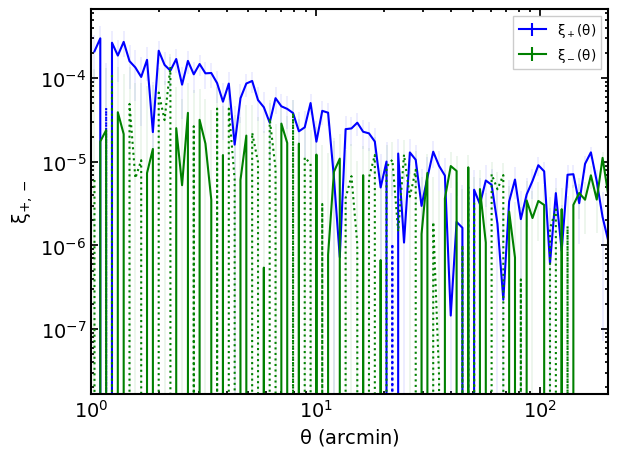

In [13]:
plt.plot(r, xip, color='blue')
plt.plot(r, -xip, color='blue', ls=':')
plt.errorbar(r[xip>0], xip[xip>0], yerr=sig[xip>0], color='blue', lw=0.1, ls='')
plt.errorbar(r[xip<0], -xip[xip<0], yerr=sig[xip<0], color='blue', lw=0.1, ls='')
lp = plt.errorbar(-r, xip, yerr=sig, color='blue')

plt.plot(r, xim, color='green')
plt.plot(r, -xim, color='green', ls=':')
plt.errorbar(r[xim>0], xim[xim>0], yerr=sig[xim>0], color='green', lw=0.1, ls='')
plt.errorbar(r[xim<0], -xim[xim<0], yerr=sig[xim<0], color='green', lw=0.1, ls='')
lm = plt.errorbar(-r, xim, yerr=sig, color='green')

plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.xlabel(r'$\theta$ (arcmin)')

plt.legend([lp, lm], [r'$\xi_+(\theta)$', r'$\xi_-(\theta)$'])
plt.xlim( [1,200] )
plt.ylabel(r'$\xi_{+,-}$')
plt.show()

This looks really messy, what if I change the number of bins?

In [14]:
gg_less_bins = treecorr.GGCorrelation(min_sep=1, max_sep=400, nbins=15, sep_units='arcmin')

In [15]:
gg_less_bins.process(cat)

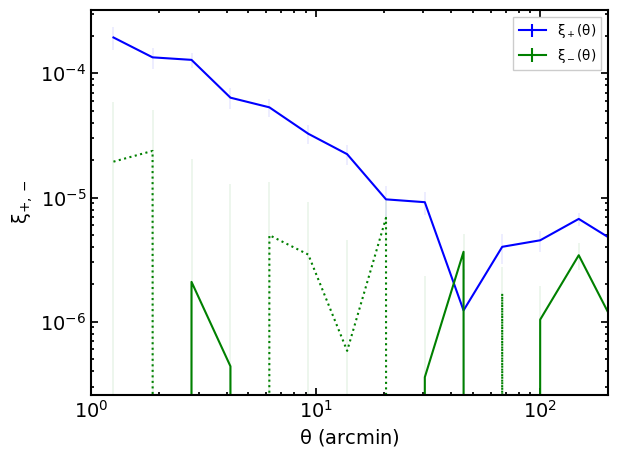

In [16]:
r_less_bins = np.exp(gg_less_bins.meanlogr)
xip_less_bins = gg_less_bins.xip
xim_less_bins = gg_less_bins.xim
sig_less_bins = np.sqrt(gg_less_bins.varxip)

plt.plot(r_less_bins, xip_less_bins, color='blue')
plt.plot(r_less_bins, -xip_less_bins, color='blue', ls=':')
plt.errorbar(r_less_bins[xip_less_bins>0], 
             xip_less_bins[xip_less_bins>0], 
             yerr=sig_less_bins[xip_less_bins>0], 
             color='blue', lw=0.1, ls='')
plt.errorbar(r_less_bins[xip_less_bins<0], 
             -xip_less_bins[xip_less_bins<0], 
             yerr=sig_less_bins[xip_less_bins<0], 
             color='blue', lw=0.1, ls='')
lp = plt.errorbar(-r_less_bins, 
                  xip_less_bins, 
                  yerr=sig_less_bins, 
                  color='blue')

plt.plot(r_less_bins, xim_less_bins, color='green')
plt.plot(r_less_bins, -xim_less_bins, color='green', ls=':')
plt.errorbar(r_less_bins[xim_less_bins>0], 
             xim_less_bins[xim_less_bins>0], 
             yerr=sig_less_bins[xim_less_bins>0], 
             color='green', lw=0.1, ls='')
plt.errorbar(r_less_bins[xim_less_bins<0], 
             -xim_less_bins[xim_less_bins<0], 
             yerr=sig_less_bins[xim_less_bins<0], 
             color='green', lw=0.1, ls='')
lm = plt.errorbar(-r_less_bins, 
                  xim_less_bins, 
                  yerr=sig_less_bins, 
                  color='green')

plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.xlabel(r'$\theta$ (arcmin)')

plt.legend([lp, lm], [r'$\xi_+(\theta)$', r'$\xi_-(\theta)$'])
plt.xlim( [1,200] )
plt.ylabel(r'$\xi_{+,-}$')
plt.show()

We will choose galaxies with  i-band magnitude <23 and then photo-z bins from 0.2-0.4, 0.4-0.6, 0.6-0.8

In [17]:
imag_mask = df['imag_cmodel']<23
cat_imag_masked = treecorr.Catalog(ra=df[imag_mask]['ira'], dec=df[imag_mask]['idec'], 
                                   ra_units='degrees', dec_units='degrees', 
                                   g1=df[imag_mask]['ishape_hsm_regauss_e1'], 
                                   g2=df[imag_mask]['ishape_hsm_regauss_e2'])

In [18]:
gg_less_bins.process(cat_imag_masked)

What does this mean?
Could error estimated in the catalog be used in treecorr?

## Compute a count-count correlation function ##

In [19]:
dd = treecorr.NNCorrelation(min_sep=0.01, max_sep=10, bin_size=0.2, sep_units='arcmins')
dd.process(cat)

A random catalog is needed to get the count-count correlation function, I used HECTOMAP_rand.fits.

In [20]:
rand_df

,object_id,object_id_isnull,ra,ra_isnull,dec,dec_isnull,tract,tract_isnull,patch_s,patch_s_isnull,iflags_pixel_bright_object_center,iflags_pixel_bright_object_center_isnull,iflags_pixel_bright_object_any,iflags_pixel_bright_object_any_isnull
0,69607899311112236,False,237.611821,False,42.457522,False,15827,False,"b'0,4'",False,False,False,False,False
1,69607899311112244,False,237.633938,False,42.465200,False,15827,False,"b'0,4'",False,False,False,False,False
2,69607899311112252,False,237.647144,False,42.483238,False,15827,False,"b'0,4'",False,False,False,False,False
3,69607899311112257,False,237.618923,False,42.476217,False,15827,False,"b'0,4'",False,False,False,False,False
4,69607899311112260,False,237.656037,False,42.436654,False,15827,False,"b'0,4'",False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885566,70418247970731195,False,247.151606,False,44.221521,False,16011,False,"b'8,6'",False,False,False,False,False
3885567,70418252265685409,False,247.152187,False,44.349561,False,16011,False,"b'8,7'",False,False,False,False,False
3885568,70418252265687776,False,247.151272,False,44.347760,False,16011,False,"b'8,7'",False,False,False,False,False
3885569,70418252265694313,False,247.153297,False,44.348181,False,16011,False,"b'8,7'",False,False,False,False,False


In [21]:
rand = treecorr.Catalog(ra=rand_df['ra'], dec=rand_df['dec'], 
                        ra_units='degrees', dec_units='degrees')

rr = treecorr.NNCorrelation(min_sep=0.1, max_sep=100, 
                            bin_size=0.2, sep_units='arcmin')
rr.process(rand)

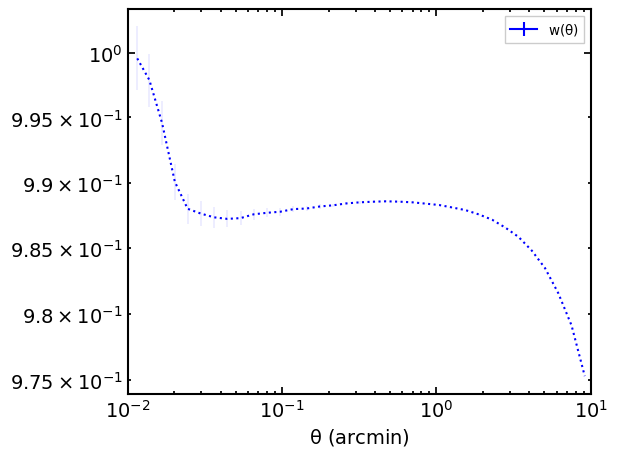

In [22]:
xi, varxi = dd.calculateXi(rr)

r = np.exp(dd.meanlogr)
sig = np.sqrt(varxi)

plt.plot(r, xi, color='blue')
plt.plot(r, -xi, color='blue', ls=':')
plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='blue', lw=0.1, ls='')
plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='blue', lw=0.1, ls='')
leg = plt.errorbar(-r, xi, yerr=sig, color='blue')

plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.xlabel(r'$\theta$ (arcmin)')

plt.legend([leg], [r'$w(\theta)$'], loc='upper right')
plt.xlim([0.01,10])
plt.show()

Or we can do data-random:

In [26]:
dr = treecorr.NNCorrelation(min_sep=0.1, max_sep=100, 
                            bin_size=0.2, sep_units='arcmins')

dr.process(cat, rand)

In [27]:
rr

NNCorrelation(config={'min_sep': 0.1, 'max_sep': 100.0, 'bin_size': 0.2, 'sep_units': 'arcmin', 'brute': False, 'verbose': 1, 'split_method': 'mean', 'max_top': 10, 'precision': 4, 'pairwise': False, 'm2_uform': 'Crittenden', 'metric': 'Euclidean', 'bin_type': 'Log', 'var_method': 'shot', 'num_bootstrap': 500})

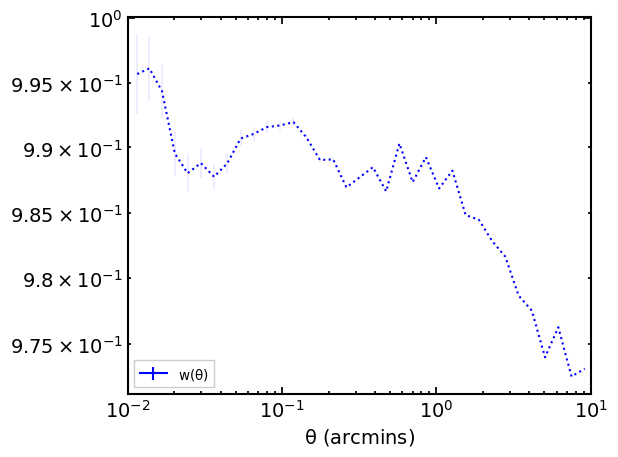

In [28]:
xi, varxi = dd.calculateXi(rr, dr)
sig = np.sqrt(varxi)

plt.plot(r, xi, color='blue')
plt.plot(r, -xi, color='blue', ls=':')
plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='blue', lw=0.1, ls='')
plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='blue', lw=0.1, ls='')
leg = plt.errorbar(-r, xi, yerr=sig, color='blue')

plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.xlabel(r'$\theta$ (arcmins)')

plt.legend([leg], [r'$w(\theta)$'], loc='lower left')
plt.xlim([0.01,10])
plt.show()

## Warning goes away when I use arcmin instead of degrees, but I don't understand that ##